<a href="https://colab.research.google.com/github/simon2016bht/PlotWisely/blob/main/BarChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:

- Robert Ritz/2022-01-26 Making Economist Style Plots in Matplotlib

- Economist

- Storytelling with Data: A Data Visualization Guide for Business Professionals 1st Edition
by Cole Nussbaumer Knaflic

- Matplotlib API Reference

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes out plots higher resolution, which makes them easier to see while building
plt.rcParams['figure.dpi'] = 100
gdp = pd.read_csv('assets/gdp_1960_2020.csv') #https://www.kaggle.com/holoong9291/gdp-of-all-countries19602020/version/3
gdp['gdp_trillions'] = gdp['gdp'] / 1_000_000_000_000
#gdp.head()
gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[gdp['state'] == 'Asia'].tail()

C:\Users\Simon\AppData\Local\Temp\ipykernel_16420\3532935795.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[gdp['state'] == 'Asia'].tail()


,year,rank,country,state,gdp,gdp_percent,gdp_trillions
9977,2020,19,Saudi Arabia,Asia,700117873249,0.009029,0.700118
9973,2020,15,Indonesia,Asia,1058423838345,0.013650,1.058424
9967,2020,9,South Korea,Asia,1630525005469,0.021028,1.630525
9963,2020,5,India,Asia,2622983732006,0.033827,2.622984
9960,2020,2,China,Asia,14722730697890,0.189870,14.722731


## Bar chart

C:\Users\Simon\AppData\Local\Temp\ipykernel_16420\3041597541.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp_bar = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[gdp['state'] == 'Asia'][-6:]
C:\Users\Simon\AppData\Local\Temp\ipykernel_16420\3041597541.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(gdp_bar['country'],      # Set labels again


Text(-0.02, 0.05, 'Source: "GDP of all countries(1960-2020)" via Kaggle.com')

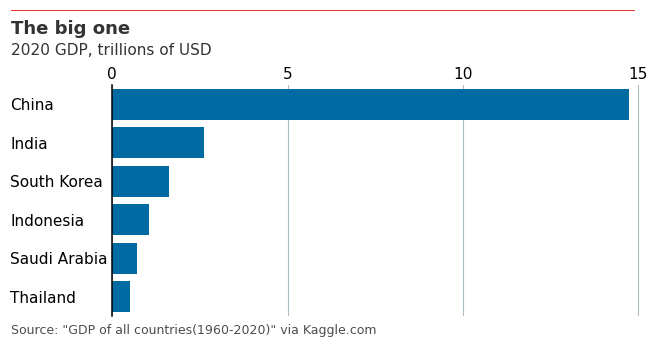

In [84]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(7,3))

# Create grid
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)

# Setup data
#gdp['country'] = gdp['country'].replace('the United States', 'United States')
#gdp_bar = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]
gdp_bar = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[gdp['state'] == 'Asia'][-6:]


# Plot data
ax.barh(gdp_bar['country'], gdp_bar['gdp_trillions'], color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_xticklabels([0, 5, 10, 15, 20])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_bar['country'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=70,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 5.5)

# Add in line and tag
ax.plot([-0.02, .87],                 # Set width of line
        [1.13, 1.13],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False,
        color='#E3120B',
        linewidth=.6)

# ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
#                            0.12,                       # Width of rectangle
#                            -0.02,                      # Height of rectangle. Negative so it goes down.
#                            facecolor='#E3120B',
#                            transform=fig.transFigure,
#                            clip_on=False,
#                            linewidth = 0))

# Add in title and subtitle
ax.text(x=-.02, y=1.05, s="The big one", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.02, y=.98, s="2020 GDP, trillions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-.02, y=.05, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
